In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'FINALDATA/WT_planktonic_final/track13278_0_processed.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = np.array(data['time'])


In [20]:
def calc_curvature_arr(file_path):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
    v_arr = np.zeros(len(data)) #init velocity array 
    t_arr = np.zeros(len(data))  #init time array    
    T_arr = np.zeros((len(data)-2, 4))  # 2D array with time + 3 components t, x,y,z

    for i in range(1, len(data)-1):

    
        x_smooth = np.array(data['x_smooth'])  #Extracting data
        y_smooth = np.array(data['y_smooth'])
        z_smooth = np.array(data['z_smooth'])
        time = np.array(data['time'])
    
        t_next = time[i+1]       #Define points for central difference
        x_next = x_smooth[i+1]
        y_next = y_smooth[i+1]
        z_next = z_smooth[i+1]
    
        t_prev = time[i-1]
        x_prev = x_smooth[i-1]
        y_prev = y_smooth[i-1]
        z_prev = z_smooth[i-1]
        
    
   # Create T direction vector, direction of displacement
        dir_vector = np.array([x_next - x_prev, y_next - y_prev, z_next - z_prev])
        
    # Normalise to get true T 
        T_vector = dir_vector / np.linalg.norm(dir_vector)
    
    # Stores t x y z in T array 
        T_arr[i-1] = np.array([time[i], *T_vector])  
    
        r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
        dt = t_next - t_prev
  
  
    #velocity at the current point using central difference
        v = r_diff/ (dt)

        v_arr[i] = v
    time_for_T = time[1:-1] # Time associated with the T vectors, lost first and last point 
        
    v_arr = v_arr[2:-2]    #velocity for final calculation. Los first and last two points
        

    dT_arr = np.zeros((len(T_arr)-2, 4))  #init dT array, loses frist and last point from T_arr
    
    for i in range(1, len(T_arr)-1):
        dT = (T_arr[i+1, 1:] - T_arr[i-1, 1:]) / (T_arr[i+1, 0] - T_arr[i-1, 0])   #central diff for dT/dt 
        dT_arr[i-1] = np.array([T_arr[i, 0], *dT])#Put associated t x, y ,z in array
        
    curvature_arr = np.zeros(len(dT_arr))    #init curve array 
    
    for i in range(len(v_arr)):
        
        dT_segment = dT_arr[i, 1:]    #extract only x y z 
        dT_magnitude = np.linalg.norm(dT_segment)  #mag of x y z vector 
        v_mag = v_arr[i] #veloctity associated with this point 
        
        curvature = dT_magnitude / v_mag  #calculate curvature
        curvature_arr[i] = curvature   #put in array 
    times_for_curvature = time[2:-2]   #Time associated with the curvature array.
    
    return curvature_arr , times_for_curvature  #Return curvatre and associated time array for plotting.

In [21]:
c_arr, t_arr  = calc_curvature_arr(file_path)


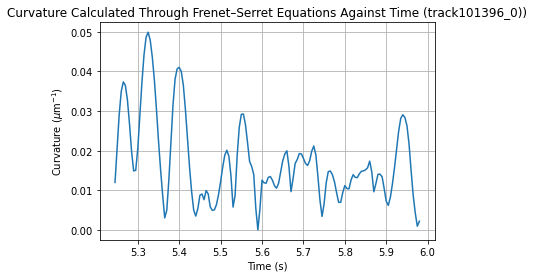

In [22]:
plt.plot(t_arr, c_arr)
plt.xlabel('Time (s)')
plt.ylabel(r'Curvature ($\mu$m$^{-1}$)')
plt.grid()
plt.savefig('FINALDATA/Plots/curvevtime.png')
plt.title('Curvature Calculated Through Frenet–Serret Equations Against Time (track101396_0))' )
plt.show()

In [23]:
data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = np.array(data['time'])

In [24]:
import os
import glob
def mean_curvature(root_dir):
    mean_curvature_WT = []

    # Iterate through all folders and subfolders in the root directory
    for foldername, subfolders, filenames in os.walk(root_dir):
        # Find all .txt files in the current folder
        for file_path in glob.glob(os.path.join(foldername, '*.txt')):
            curvature = calc_curvature_arr(file_path)
            mean_curvature  = np.mean(curvature)
            mean_curvature_WT.append(mean_curvature)
            

    return np.array(mean_curvature_WT)